In [113]:
# these are "libraries" that help us cut down on the amount of code that is needed to write

# requests helps us access the website we want
import requests
# BeautifulSoup helps us make sense of the elements of a website
from bs4 import BeautifulSoup
# pandas helps us organize the data we have collected
import pandas as pd
# matplotlib helps us do simple visualizations of the data
import matplotlib.pyplot as plt

In [114]:
# For this workshop, we will be using a web scraping "sandbox"
# The bookstore ("sandbox") is at this link: http://books.toscrape.com/

#url = '[INSERT LINK HERE]'
url = 'http://books.toscrape.com/'

In [115]:
# Run this cell to see the HTML code that we get as a response
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [116]:
# first, try taking off the ".text" part below
# then, try replacing 'a' with some other elements:
# 'ul': list
# 'div': 

try_it_out = soup.find('ul').text
print(try_it_out)



Home

All products



In [155]:
# Now use one part of the website to start getting some information
side_categories = soup.find(class_ ="side_categories")
print(side_categories)

<div class="side_categories">
<ul class="nav nav-list">
<li>
<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
          

In [162]:
# Now, lets find one category from this
first_category = side_categories.find('li')
print(first_category)

<li>
<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
                        </a>
</li>
<l

In [172]:
# Turns out, the first element in this list is also a list. So, we will look at the next one
all_categories = side_categories.find_all('a')
print(all_categories)

[<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>, <a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>, <a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>, <a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>, <a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
                        </a>, <a href="catalogue/category/books/classics_6/index

In [173]:
# This returns a list of all the objects with a <li>
# To get a random on, we can use the index
random_category = all_categories[5]
print(random_category)

<a href="catalogue/category/books/classics_6/index.html">
                            
                                Classics
                            
                        </a>


In [175]:
# But we only want the title. So now we will "parse" this information
print(random_category.text.strip())

Classics


In [176]:
# Now, we want to do this for all of the titles.
# So, we can "loop" through it

parsed_categories_list = []
for cat in all_categories:
    list_cat = cat.text.strip()
    parsed_categories_list.append(list_cat)
        
print(parsed_categories_list)


['Books', 'Travel', 'Mystery', 'Historical Fiction', 'Sequential Art', 'Classics', 'Philosophy', 'Romance', 'Womens Fiction', 'Fiction', 'Childrens', 'Religion', 'Nonfiction', 'Music', 'Default', 'Science Fiction', 'Sports and Games', 'Add a comment', 'Fantasy', 'New Adult', 'Young Adult', 'Science', 'Poetry', 'Paranormal', 'Art', 'Psychology', 'Autobiography', 'Parenting', 'Adult Fiction', 'Humor', 'Horror', 'History', 'Food and Drink', 'Christian Fiction', 'Business', 'Biography', 'Thriller', 'Contemporary', 'Spirituality', 'Academic', 'Self Help', 'Historical', 'Christian', 'Suspense', 'Short Stories', 'Novels', 'Health', 'Politics', 'Cultural', 'Erotica', 'Crime']


In [179]:
# Now, we want to get the links from each of these
parsed_links_list = []
for cat in all_categories:
    list_cat = cat['href']
    parsed_links_list.append(list_cat)
        
print(parsed_links_list)

['catalogue/category/books_1/index.html', 'catalogue/category/books/travel_2/index.html', 'catalogue/category/books/mystery_3/index.html', 'catalogue/category/books/historical-fiction_4/index.html', 'catalogue/category/books/sequential-art_5/index.html', 'catalogue/category/books/classics_6/index.html', 'catalogue/category/books/philosophy_7/index.html', 'catalogue/category/books/romance_8/index.html', 'catalogue/category/books/womens-fiction_9/index.html', 'catalogue/category/books/fiction_10/index.html', 'catalogue/category/books/childrens_11/index.html', 'catalogue/category/books/religion_12/index.html', 'catalogue/category/books/nonfiction_13/index.html', 'catalogue/category/books/music_14/index.html', 'catalogue/category/books/default_15/index.html', 'catalogue/category/books/science-fiction_16/index.html', 'catalogue/category/books/sports-and-games_17/index.html', 'catalogue/category/books/add-a-comment_18/index.html', 'catalogue/category/books/fantasy_19/index.html', 'catalogue/

In [181]:
# Now, we will use these links to see how many exist in each category
# We will do this by creating a new request
response2 = requests.get(url + parsed_links_list[0])
print(url + parsed_links_list[0])

soup2 = BeautifulSoup(response2.text, 'html.parser')
number_of_results = soup2.find('form').find('strong').text

print(number_of_results)

http://books.toscrape.com/catalogue/category/books_1/index.html
1000


In [182]:
# Now, lets do that for each of the categories
results_list = []
for link in parsed_links_list:
    response2 = requests.get(url + link)

    soup2 = BeautifulSoup(response2.text, 'html.parser')
    number_of_results = int(soup2.find('form').find('strong').text)
    
    results_list.append(number_of_results)
    
print(results_list)

[1000, 11, 32, 26, 75, 19, 11, 35, 17, 65, 29, 7, 110, 13, 152, 16, 5, 67, 48, 6, 54, 14, 19, 1, 8, 7, 9, 1, 1, 10, 17, 18, 30, 6, 12, 5, 11, 3, 6, 1, 5, 2, 3, 1, 1, 1, 4, 3, 1, 1, 1]


In [183]:
# Now, we can use the pandas library to organize what we have so far
data = {
    "categories": parsed_categories_list,
    "results": results_list,
    "links": parsed_links_list 
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df) 

            categories  results  \
0                Books     1000   
1               Travel       11   
2              Mystery       32   
3   Historical Fiction       26   
4       Sequential Art       75   
5             Classics       19   
6           Philosophy       11   
7              Romance       35   
8       Womens Fiction       17   
9              Fiction       65   
10           Childrens       29   
11            Religion        7   
12          Nonfiction      110   
13               Music       13   
14             Default      152   
15     Science Fiction       16   
16    Sports and Games        5   
17       Add a comment       67   
18             Fantasy       48   
19           New Adult        6   
20         Young Adult       54   
21             Science       14   
22              Poetry       19   
23          Paranormal        1   
24                 Art        8   
25          Psychology        7   
26       Autobiography        9   
27           Parenti

No handles with labels found to put in legend.


<Figure size 2160x288 with 0 Axes>

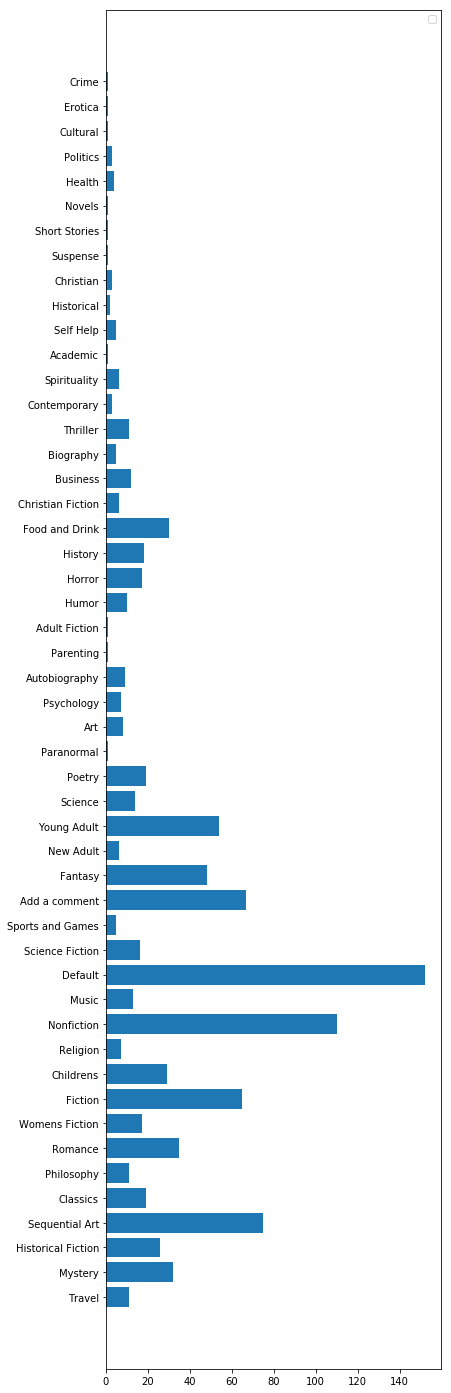

In [188]:
# Bonus: Visualizing the Data using matplotlib

# plot lines
plt.figure().set_figwidth(30)
plt.figure().set_figheight(25)
# taking out "Books"
plt.barh(parsed_categories_list[1:], results_list[1:])
plt.legend()
plt.show()